# ISIC 2024 - Skin Cancer Detection with 3D-TBP

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu
!pip install autogluon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
conda 24.5.0 requires packaging>=23.0, but you have packaging 21.3 which is incompatible.
jupyterlab 4.2.3 requires jup

In [10]:
!pip install autogluon

  Using cached autogluon-1.1.1-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.core-1.1.1-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.features-1.1.1-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.tabular-1.1.1-py3-none-any.whl.metadata (13 kB)
  Using cached autogluon.multimodal-1.1.1-py3-none-any.whl.metadata (12 kB)
  Using cached autogluon.timeseries-1.1.1-py3-none-any.whl.metadata (12 kB)
  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached autogluon.common-1.1.1-py3-none-any.whl.metadata (11 kB)
  Using cached ray-2.10.0-cp310-cp310-manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached pillow-10.4.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached torch-2.3.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached lightning-2.3.3-py3-none-any.whl.metadata (35 kB)
  Using cached transformers-4.40.2-py3-none-any.whl.metadata (137 kB)
  Us

In [12]:
import pandas as pd
import numpy as np

### Visualize dataset

In [4]:
# Create the train dataset in pandas by reading the csv
train = pd.read_csv("/kaggle/input/isic-2024-challenge/train-metadata.csv", low_memory=False)
train.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [5]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [6]:
# Create the test pandas dataframe in pandas by reading the csv
test = pd.read_csv("/kaggle/input/isic-2024-challenge/test-metadata.csv", low_memory=False)
test.head()

,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,...,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,...,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,...,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


In [7]:
# Same thing as train and test dataset
submission = pd.read_csv("/kaggle/input/isic-2024-challenge/sample_submission.csv")
submission.head()

,isic_id,target
0,ISIC_0015657,0.3
1,ISIC_0015729,0.3
2,ISIC_0015740,0.3


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

NameError: name 'TabularPredictor' is not defined

### Review AutoGluon's training run with ranking of models that did the best.

In [9]:
predictor.fit_summary()

*** Summary of fit() ***

Estimated performance of each model:

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order

0      WeightedEnsemble_L3  -51.960611       8.856329  467.275312                0.000545           0.261043            3       True         19

1   RandomForestMSE_BAG_L2  -53.447404       8.145246  421.951596                0.569642          41.083103            2       True         14

2   NeuralNetFastAI_BAG_L2  -53.875418       7.728896  414.715043                0.153292          33.846550            2       True         17

3     ExtraTreesMSE_BAG_L2  -53.991947       8.132851  392.084616                0.557247          11.216123            2       True         16

4          LightGBM_BAG_L2  -55.139547       7.759336  391.863559                0.183731          10.995066            2       True         13

5          CatBoost_BAG_L2  -55.808344       7.613044  434.362521 

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"

  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleMode

### Create predictions from test dataset

In [10]:
predictions = predictor.predict(test)
predictions.head()

0    25.975296
1    40.711525
2    45.083908
3    47.625813
4    50.531471
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [11]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      101.889488
std        88.546730
min         0.793934
25%        23.090492
50%        69.439598
75%       170.216644
max       353.417358
Name: count, dtype: float64

In [12]:
# How many negative values do we have?
negative_values = predictions < 0
np.count_nonzero(negative_values)

0

In [13]:
# Set them to zero
np.clip(predictions, 0, None)

0        25.975296
1        40.711525
2        45.083908
3        47.625813
4        50.531471
           ...    
6488    167.186798
6489    167.188660
6490    165.934204
6491    153.147095
6492    154.898697
Name: count, Length: 6493, dtype: float32

In [14]:
leaderboard = predictor.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order

0      WeightedEnsemble_L3  -51.960611       8.856329  467.275312                0.000545           0.261043            3       True         19

1   RandomForestMSE_BAG_L2  -53.447404       8.145246  421.951596                0.569642          41.083103            2       True         14

2   NeuralNetFastAI_BAG_L2  -53.875418       7.728896  414.715043                0.153292          33.846550            2       True         17

3     ExtraTreesMSE_BAG_L2  -53.991947       8.132851  392.084616                0.557247          11.216123            2       True         16

4          LightGBM_BAG_L2  -55.139547       7.759336  391.863559                0.183731          10.995066            2       True         13

5          CatBoost_BAG_L2  -55.808344       7.613044  434.362521                0.037440          53.494028            2       Tr

In [20]:
predictor.get_model_best()

'WeightedEnsemble_L3'

### Set predictions to submission dataframe, save, and submit

In [21]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [22]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 654kB/s]

Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [23]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  

---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  

submission.csv               2024-05-03 16:05:42  first raw submission               complete  1.76244      1.76244       

submission_new_hpo.csv       2024-05-02 20:31:13  new features with hyperparameters  complete  1.29706      1.29706       

submission_new_features.csv  2024-05-02 20:22:36  new features                       complete  1.8044       1.8044        

submission.csv               2024-05-02 20:11:33  first raw submission               complete  1.80353      1.80353       


#### Initial score of `1.76244`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

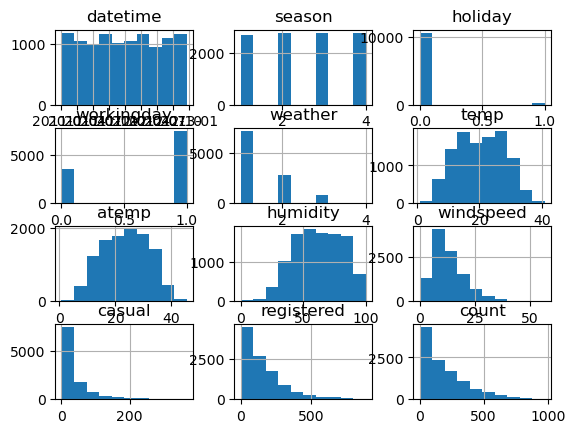

In [24]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [25]:
def is_rush_hour(hour):
    if (7 <= hour <= 9):
        return 1
    elif (11 <= hour <= 13):
        return 1
    elif (17 <= hour <= 18):
        return 1
    else: 
        return 0

In [26]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
train['rush_hour'] = train['hour'].apply(is_rush_hour)

test["hour"] = test["datetime"].dt.hour
test['rush_hour'] = test['hour'].apply(is_rush_hour)

In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,rush_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,0


In [28]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,rush_hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,0


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [29]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [30]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,rush_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,0


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'rush_hour'}>]], dtype=object)

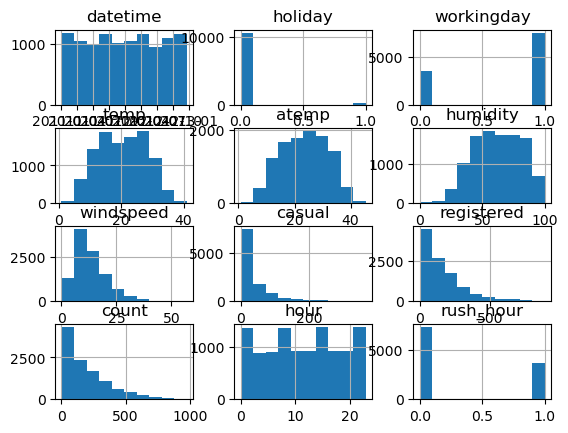

In [31]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [32]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data= train.drop(["casual", "registered"], axis=1),
    time_limit= 600,
    presets= "best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240503_160630"

Presets specified: ['best_quality']

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA

Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20

Beginning AutoGluon training ... Time limit = 600s

AutoGluon will save models to "AutogluonModels/ag-20240503_160630"

AutoGluon Version:  0.8.2

Python Version:     3.10.14

Operating System:   Linux

Platform Machine:   x86_64

Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024

Disk Space Avail:   2.59 GB / 5.36 GB (48.3%)


	We recommend a minimum available disk space of 10 GB, and large datasets may require more.

Train Data Rows:    10886

Train Data Columns: 11

[1000]	valid_set's rmse: 36.4158

[2000]	valid_set's rmse: 34.975

[3000]	valid_set's rmse: 34.6271

[4000]	valid_set's rmse: 34.5596

[5000]	valid_set's rmse: 34.5096

[6000]	valid_set's rmse: 34.5359

[1000]	valid_set's rmse: 36.586

[2000]	valid_set's rmse: 34.9737

[3000]	valid_set's rmse: 34.4964

[4000]	valid_set's rmse: 34.3236

[5000]	valid_set's rmse: 34.2139

[6000]	valid_set's rmse: 34.2134

[7000]	valid_set's rmse: 34.2543

[1000]	valid_set's rmse: 35.6108

[2000]	valid_set's rmse: 34.2978

[3000]	valid_set's rmse: 33.7544

[4000]	valid_set's rmse: 33.5246

[5000]	valid_set's rmse: 33.3851

[6000]	valid_set's rmse: 33.2842

[7000]	valid_set's rmse: 33.2418

[8000]	valid_set's rmse: 33.2271

[9000]	valid_set's rmse: 33.2196

[1000]	valid_set's rmse: 38.9505

[2000]	valid_set's rmse: 37.2297

[3000]	valid_set's rmse: 36.5739

[4000]	valid_set's rmse: 36.3781

[5000]	valid_set's rmse: 36.2798

[6000]	valid_set's rmse: 36.2932

[1000]	valid_set's rmse: 37.5215

[2000]	valid_set

	-34.6322	 = Validation score   (-root_mean_squared_error)

	55.6s	 = Training   runtime

	6.84s	 = Validation runtime

Fitting model: LightGBM_BAG_L1 ... Training model for up to 329.68s of the 529.64s of remaining time.

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 32.7764

[2000]	valid_set's rmse: 32.709

[1000]	valid_set's rmse: 32.439

[2000]	valid_set's rmse: 32.011

[1000]	valid_set's rmse: 32.0555

[2000]	valid_set's rmse: 31.5793

[3000]	valid_set's rmse: 31.2951

[4000]	valid_set's rmse: 31.0794

[5000]	valid_set's rmse: 31.0484

[6000]	valid_set's rmse: 31.0554

[7000]	valid_set's rmse: 31.0834

[1000]	valid_set's rmse: 36.1275

[2000]	valid_set's rmse: 35.2536

[3000]	valid_set's rmse: 35.0901

[4000]	valid_set's rmse: 35.075

[1000]	valid_set's rmse: 35.7471

[2000]	valid_set's rmse: 35.6412

[1000]	valid_set's rmse: 31.6528

[1000]	valid_set's rmse: 37.7812

[2000]	valid_set's rmse: 37.4093

[3000]	valid_set's rmse: 37.2796

[1000]	valid_set's rmse: 34.4137

[2000]	valid_set's rmse: 34.0186

[3000]	valid_set's rmse: 33.9624


	-33.6909	 = Validation score   (-root_mean_squared_error)

	25.27s	 = Training   runtime

	3.01s	 = Validation runtime

Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 297.94s of the 497.91s of remaining time.

	-39.756	 = Validation score   (-root_mean_squared_error)

	15.2s	 = Training   runtime

	0.55s	 = Validation runtime

Fitting model: CatBoost_BAG_L1 ... Training model for up to 281.82s of the 481.78s of remaining time.

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Ran out of time, early stopping on iteration 3676.

	Ran out of time, early stopping on iteration 3722.

	Ran out of time, early stopping on iteration 3782.

	Ran out of time, early stopping on iteration 3912.

	Ran out of time, early stopping on iteration 3966.

	Ran out of time, early stopping on iteration 4186.

	Ran out of time, early stopping on iteration 4457.

	Ran out of time, early stopping on iteration 5078.

	-33.3818	 = Validation score   (-

[1000]	valid_set's rmse: 29.4415

[1000]	valid_set's rmse: 30.6522


	-30.8785	 = Validation score   (-root_mean_squared_error)

	11.41s	 = Training   runtime

	0.53s	 = Validation runtime

Fitting model: LightGBM_BAG_L2 ... Training model for up to 186.96s of the 186.95s of remaining time.

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	-30.6166	 = Validation score   (-root_mean_squared_error)

	9.41s	 = Training   runtime

	0.19s	 = Validation runtime

Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 177.1s of the 177.09s of remaining time.

	-31.7844	 = Validation score   (-root_mean_squared_error)

	40.05s	 = Training   runtime

	0.58s	 = Validation runtime

Fitting model: CatBoost_BAG_L2 ... Training model for up to 136.11s of the 136.1s of remaining time.

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Ran out of time, early stopping on iteration 1636.

	Ran out of time, early stopping on iteration 1840.

	-30.2629	 = Validation score   (-root_m

In [33]:
predictor_new_features.fit_summary()

*** Summary of fit() ***

Estimated performance of each model:

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order

0      WeightedEnsemble_L3  -30.061008      12.260191  519.962460                0.000535           0.229082            3       True         16

1          CatBoost_BAG_L2  -30.262904      11.340273  481.589000                0.048401         105.323649            2       True         13

2          LightGBM_BAG_L2  -30.616601      11.479500  385.679243                0.187627           9.413891            2       True         11

3        LightGBMXT_BAG_L2  -30.878479      11.823967  387.679640                0.532095          11.414289            2       True         10

4     ExtraTreesMSE_BAG_L2  -31.582283      11.857646  387.402633                0.565774          11.137282            2       True         14

5   RandomForestMSE_BAG_L2  -31.784446      11.868928  416.317285 

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"

  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_

In [34]:
new_predictions = predictor_new_features.predict(test)

In [35]:
new_predictions.describe()

count    6493.000000
mean      151.247131
std       129.706223
min         0.978241
25%        53.444290
50%       117.986908
75%       215.515854
max       790.592285
Name: count, dtype: float64

In [36]:
# Remember to set all negative values to zero
np.clip(new_predictions, 0, None)

0        14.552795
1        10.361506
2         9.547688
3         8.700449
4         7.781295
           ...    
6488    293.229950
6489    206.042419
6490    152.949722
6491    110.413544
6492     72.778168
Name: count, Length: 6493, dtype: float32

In [37]:
leaderboard = predictor_new_features.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order

0      WeightedEnsemble_L3  -30.061008      12.260191  519.962460                0.000535           0.229082            3       True         16

1          CatBoost_BAG_L2  -30.262904      11.340273  481.589000                0.048401         105.323649            2       True         13

2          LightGBM_BAG_L2  -30.616601      11.479500  385.679243                0.187627           9.413891            2       True         11

3        LightGBMXT_BAG_L2  -30.878479      11.823967  387.679640                0.532095          11.414289            2       True         10

4     ExtraTreesMSE_BAG_L2  -31.582283      11.857646  387.402633                0.565774          11.137282            2       True         14

5   RandomForestMSE_BAG_L2  -31.784446      11.868928  416.317285                0.577056          40.051934            2       Tr

In [38]:
predictor_new_features.get_model_best()

'WeightedEnsemble_L3'

In [39]:
submission_new_features = pd.read_csv("sampleSubmission.csv")

In [40]:
# Same submitting predictions
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 703kB/s]

Successfully submitted to Bike Sharing Demand

In [42]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  

---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  

submission_new_features.csv  2024-05-03 16:17:25  new features                       complete  0.70749      0.70749       

submission.csv               2024-05-03 16:05:42  first raw submission               complete  1.76244      1.76244       

submission_new_hpo.csv       2024-05-02 20:31:13  new features with hyperparameters  complete  1.29706      1.29706       

submission_new_features.csv  2024-05-02 20:22:36  new features                       complete  1.8044       1.8044        


#### New Score of `0.70749`

In [43]:
hyperparameters = {
    "XGB": {"learning_rate": 0.01, "n_estimators": 1000},
    "KNN": {"n_neighbors": 5, "weights": "uniform"},
    "NN_TORCH": {"criterion": "mse", "learning_rate": 0.01}
}

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [44]:
import autogluon.core as ag
## From autogluon documentation
nn_options = {  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability 
    'learning_rate': ag.space.Real(0.001, 0.01, default=0.01)
}

xgb_options = {  
    'learning_rate': ag.space.Real(0.001, 0.01, default=0.01),
    'n_estimators': ag.space.Int(lower=50, upper=100, default=100)  # number of leaves in trees
}

gbm_options = {  
    'num_boost_round': 100,  # number of boosting rounds 
    'num_leaves': ag.space.Int(lower=20, upper=60, default=30),  # number of leaves in trees
}

hyperparameters = {  # hyperparameters of each model type
                    'GBM': gbm_options,
                    'XGB': xgb_options,
                    'NN_TORCH': nn_options, 
                  }  

num_trials = 3  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality', hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20240503_161748"

Presets specified: ['best_quality']


Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20

Beginning AutoGluon training ... Time limit = 600s

AutoGluon will save models to "AutogluonModels/ag-20240503_161748"

AutoGluon Version:  0.8.2

Python Version:     3.10.14

Operating System:   Linux

Platform Machine:   x86_64

Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024

Disk Space Avail:   1.23 GB / 5.36 GB (22.9%)


	We recommend a minimum available disk space of 10 GB, and large datasets may require more.

Train Data Rows:    10886

Train Data Columns: 11

Label Column: count

Preprocessing data ...

/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context("mo

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

Fitted model: LightGBM_BAG_L1/T1 ...

	-41.8773	 = Validation score   (-root_mean_squared_error)

	3.27s	 = Training   runtime

	0.0s	 = Validation runtime

Fitted model: LightGBM_BAG_L1/T2 ...

	-40.7757	 = Validation score   (-root_mean_squared_error)

	3.11s	 = Training   runtime

	0.0s	 = Validation runtime

Fitted model: LightGBM_BAG_L1/T3 ...

	-39.4747	 = Validation score   (-root_mean_squared_error)

	3.66s	 = Training   runtime

	0.0s	 = Validation runtime

Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 119.94s of the 589.75s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

Fitted model: XGBoost_BAG_L1/T1 ...

	-122.3179	 = Validation score   (-root_mean_squared_error)

	2.44s	 = Training   runtime

	0.0s	 = Validation runtime

Fitted model: XGBoost_BAG_L1/T2 ...

	-192.2638	 = Validation score   (-root_mean_squared_error)

	1.73s	 = Training   runtime

	0.0s	 = Validation runtime

Fitted model: XGBoost_BAG_L1/T3 ...

	-181.3583	 = Validation score   (-root_mean_squared_error)

	1.57s	 = Training   runtime

	0.0s	 = Validation runtime

Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 119.94s of the 583.94s of remaining time.

Will use custom hpo logic because ray import failed. Reason: ray is required to train folds in parallel for TabularPredictor or HPO for Multi

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Ran out of time, stopping training early. (Stopping on epoch 47)

	Ran out of time, stopping training early. (Stopping on epoch 47)

	Ran out of time, stopping training early. (Stopping on epoch 50)

	Ran out of time, stopping training early. (Stopping on epoch 52)

	Ran out of time, stopping training early. (Stopping on epoch 61)

	Ran out of time, stopping training early. (Stopping on epoch 66)

	Ran out of time, stopping training early. (Stopping on epoch 81)

	Stopping HPO to satisfy time limit...

Fitted model: NeuralNetTorch_BAG_L1/T1 ...

	-43.267	 = Validation score   (-root_mean_squared_error)

	110.1s	 = Training   runtime

	0.0s	 = Validation runtime

Repeating k-fold bagging: 2/20

Fitting model: LightGBM_BAG_L1/T1 ... Training model for up to 273.74s of the 473.79s of remaining time.

	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy

	-41.6278	 =

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

Fitted model: LightGBM_BAG_L2/T1 ...

	-35.6116	 = Validation score   (-root_mean_squared_error)

	3.9s	 = Training   runtime

	0.0s	 = Validation runtime

Fitted model: LightGBM_BAG_L2/T2 ...

	-35.5666	 = Validation score   (-root_mean_squared_error)

	3.61s	 = Training   runtime

	0.0s	 = Validation runtime

Fitted model: LightGBM_BAG_L2/T3 ...

	-35.4947	 = Validation score   (-root_mean_squared_error)

	4.5s	 = Training   runtime

	0.0s	 = Validation runtime

Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 77.47s of the 246.13s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

Fitted model: XGBoost_BAG_L2/T1 ...

	-102.9771	 = Validation score   (-root_mean_squared_error)

	3.85s	 = Training   runtime

	0.0s	 = Validation runtime

Fitted model: XGBoost_BAG_L2/T2 ...

	-179.9021	 = Validation score   (-root_mean_squared_error)

	2.35s	 = Training   runtime

	0.0s	 = Validation runtime

Fitted model: XGBoost_BAG_L2/T3 ...

	-165.4025	 = Validation score   (-root_mean_squared_error)

	2.33s	 = Training   runtime

	0.0s	 = Validation runtime

Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 77.47s of the 237.52s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy

	Ran out of time, stopping training early. (Stopping on epoch 29)

	Ran out of time, stopping training early. (Stopping on epoch 31)

	Ran out of time, stopping training early. (Stopping on epoch 32)

	Ran out of time, stopping training early. (Stopping on epoch 34)

	Ran out of time, stopping training early. (Stopping on epoch 36)

	Ran out of time, stopping training early. (Stopping on epoch 40)

	Stopping HPO to satisfy time limit...

Fitted model: NeuralNetTorch_BAG_L2/T1 ...

	-36.3096	 = Validation score   (-root_mean_squared_error)

	66.06s	 = Training   runtime

	0.0s	 = Validation runtime

Repeating k-fold bagging: 2/20

Fitting model: LightGBM_BAG_L2/T1 ... Training model for up to 171.42s of the 171.41s of remaining time.

	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy

	-35.5087	 = Validation score   (-root_mean_squared_error)

	7.6s	 = Training 

In [45]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***

Estimated performance of each model:

                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order

0        WeightedEnsemble_L3  -34.973949       1.014937  507.240686                0.000481           0.259404            3       True         16

1         LightGBM_BAG_L2/T3  -35.285939       0.792310  348.715748                0.112876           8.682667            2       True         11

2         LightGBM_BAG_L2/T2  -35.370624       0.757174  347.123964                0.077740           7.090882            2       True         10

3         LightGBM_BAG_L2/T1  -35.508665       0.766340  347.633551                0.086906           7.600470            2       True          9

4   NeuralNetTorch_BAG_L2/T1  -35.717646       0.823841  491.207733                0.144407         151.174652            2       True         15

5        WeightedEnsemble_L2  -36.333190       0.21259

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"

  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T3': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -41.6278388237103,
  'LightGBM_BAG_L1/T2': -4

In [46]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [47]:
predictions_new_hpo.describe()

count    6493.000000
mean      184.629364
std       167.977203
min         3.979886
25%        44.685585
50%       145.069519
75%       274.177429
max       879.674561
Name: count, dtype: float64

In [48]:
np.clip(predictions_new_hpo, 0, None)

0        12.936041
1         6.094653
2         5.021642
3         4.668604
4         4.771062
           ...    
6488    293.415131
6489    214.241547
6490    152.352142
6491    112.591766
6492     69.603058
Name: count, Length: 6493, dtype: float32

In [49]:
leaderboard = predictor_new_hpo.leaderboard()

                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order

0        WeightedEnsemble_L3  -34.973949       1.014937  507.240686                0.000481           0.259404            3       True         16

1         LightGBM_BAG_L2/T3  -35.285939       0.792310  348.715748                0.112876           8.682667            2       True         11

2         LightGBM_BAG_L2/T2  -35.370624       0.757174  347.123964                0.077740           7.090882            2       True         10

3         LightGBM_BAG_L2/T1  -35.508665       0.766340  347.633551                0.086906           7.600470            2       True          9

4   NeuralNetTorch_BAG_L2/T1  -35.717646       0.823841  491.207733                0.144407         151.174652            2       True         15

5        WeightedEnsemble_L2  -36.333190       0.212596  316.997120                0.000466           0.259212        

In [51]:
predictor_new_hpo.get_model_best()

'WeightedEnsemble_L3'

In [52]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv")

In [53]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [54]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 696kB/s]

Successfully submitted to Bike Sharing Demand

In [57]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  

---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  

submission_new_hpo.csv       2024-05-03 16:27:25  new features with hyperparameters  complete  0.4396       0.4396        

submission_new_features.csv  2024-05-03 16:17:25  new features                       complete  0.70749      0.70749       

submission.csv               2024-05-03 16:05:42  first raw submission               complete  1.76244      1.76244       

submission_new_hpo.csv       2024-05-02 20:31:13  new features with hyperparameters  complete  1.29706      1.29706       


#### New Score of `0.43960`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

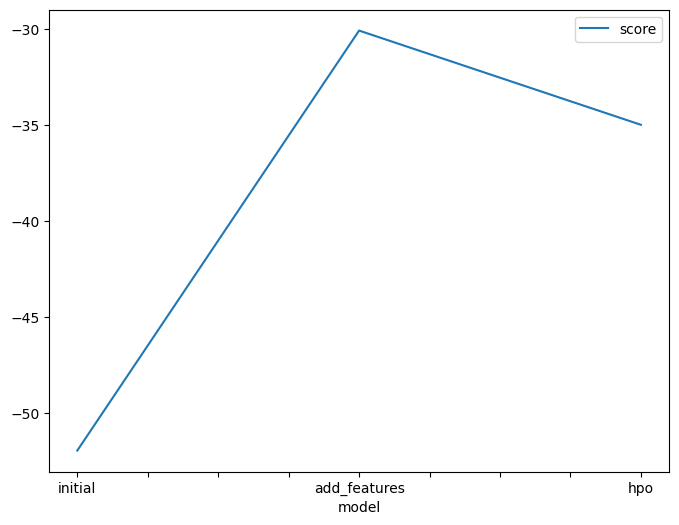

In [58]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
scores = [predictor.leaderboard(silent=True)['score_val'][0],
         predictor_new_features.leaderboard(silent=True)['score_val'][0],
         predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]

fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": scores
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

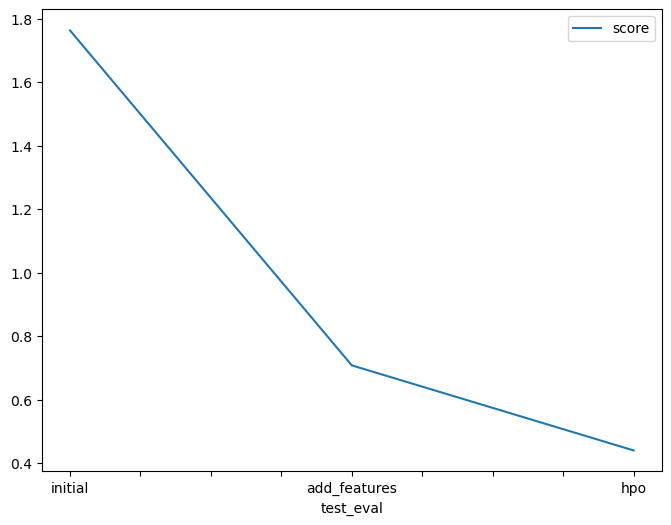

In [59]:
# Take the 3 kaggle scores from this run and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.76244, 0.70749, 0.43960]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [60]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "XGBoost"],
    "hpo2": ["default", "default", "KNN"],
    "hpo3": ["default", "default", "NN_TORCH"],
    "score":  [1.76244, 0.70749, 0.43960]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.76244
1,add_features,default,default,default,0.70749
2,hpo,XGBoost,KNN,NN_TORCH,0.43960
